In [1]:
from stdmodandoption import *

wanted='nsrad'
dirneed = ['m12mmhdcvhr']
the_prefix = 'snapshot'
the_suffix = '.hdf5'


if wanted=='sfrrad' or wanted=='nsrad' or wanted == 'cumnsmrad':
    withinr = 15.
    minr = 0.5
    maxlength=0.25
    usecen=0
    normalized=1
    usenscen=1
    usesphrad=1
    uselog=1
    Myrneed=600
    ageneed=200 #Myr
    radlist = np.linspace(minr, withinr,10)
    for runtodo in dirneed:
        info=SSF.outdirname(runtodo, Myrneed)
        rundir=info['rundir']
        runtitle=info['runtitle']
        slabel=info['slabel']
        snlabel=info['snlabel']
        dclabel=info['dclabel']
        resolabel=info['resolabel']
        the_snapdir=info['the_snapdir']
        Nsnapstring=info['Nsnapstring']
        havecr=info['havecr']
        haveB=info['haveB']
        Fcal=info['Fcal']
        iavesfr=info['iavesfr']
        timestep=info['timestep']
        color=info['color']
        h0=info['h0']
        cosmo=info['cosmo']
        usepep=info['usepep']
        maindir=info['maindir']
        snumadd=info['snumadd']
        halostr=info['halostr']
        rotface = 1
        loccen = 1
        S = SSF.readsnapwcen(the_snapdir, Nsnapstring, 4, snapshot_name=the_prefix, extension=the_suffix,\
         havecr=havecr,h0=h0,cosmo=cosmo, usepep=usepep, maindir=maindir,snumadd=snumadd,rotface=rotface,\
         loccen=loccen,runtodo=runtodo,rundir=rundir,halostr=halostr)
        Sage = S['age']
        Spos = S['p']
        Sx = Spos[:,0]
        Sy = Spos[:,1]
        Sz = Spos[:,2]
        Sm = S['m']
        agecutlow = np.amax(Sage)-0.001*ageneed
        agecuthigh = np.amax(Sage)
        cuta = (Sage> agecutlow) & (Sage <agecuthigh)
        Sx=Sx[cuta]; Sy=Sy[cuta]; Sz=Sz[cuta]; Sm=Sm[cuta];
        G = SSF.readsnapwcen(the_snapdir, Nsnapstring, 0, snapshot_name=the_prefix, extension=the_suffix,\
         havecr=havecr,h0=h0,cosmo=cosmo, usepep=usepep, maindir=maindir,snumadd=snumadd,rotface=rotface,\
         loccen=loccen,runtodo=runtodo,rundir=rundir,halostr=halostr)

rundir /m12m_mass7000/mhdcv/
loading file : /home/tkc004//oasis/philruns///m12m_mass7000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [4256397 9151905 1511331       0 2552816       0]
npart_total: [113153381 140876456  10063684         0  29025856         0]
flag_cooling 1
this time 1.0
hubble 0.702
atime 1.0
loading file : /home/tkc004//oasis/philruns///m12m_mass7000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [4256397 9151905 1511331       0 2552816       0]
npart_total: [113153381 140876456  10063684         0  29025856         0]
flag_cooling 1
xvcen, yvcen, zvcen -181.29 -7.56 140.7
rundir /m12m_mass7000/mhdcv/
Gvx,Gvy,Gvz -9.172435431572618 1.2023559394754186 8.627861295398683
loading file : /home/tkc004//oasis/philruns///m12m_mass7000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [4256397 9151905 1511331       0 2552816       0]
npart_total: [113153381 140876456  10063684         0  29025856         0]
flag_cooling 1
this time 1.0


In [2]:
Gsurdenlist = SSF.calsurden(G,radlist,maxlength)
print 'Gsurdenlist', Gsurdenlist
Ssurdenlist = SSF.calsurden(S,radlist,maxlength)
print 'Ssurdenlist', Ssurdenlist
print 'disksurdenlist', Ssurdenlist+Gsurdenlist

Gsurdenlist [12.12835566 11.77986886  7.92329873  5.86467079  1.64950302  1.30904843
  0.59828299  0.15847245  0.06794498  0.        ]
Ssurdenlist [575.29745885  67.79256284  31.26027982  20.52071991  12.25178082
   6.63467619   3.73676725   2.26464531   1.49583197   0.        ]
disksurdenlist [587.42581451  79.57243171  39.18357855  26.3853907   13.90128384
   7.94372462   4.33505024   2.42311777   1.56377695   0.        ]


In [7]:
def calsurdenxy(Gextra,xlist,ylist,maxlength): #length in kpc
    xx, yy = np.meshgrid(xlist, ylist)
    gasdenlist = 0.0*xx
    Gp = Gextra['p']; Gx = Gp[:,0]; Gy = Gp[:,1]; Gz = Gp[:,2];
    Gm = Gextra['m'];
    for ix in range(len(xlist)-1):
        for iy in range(len(ylist)-1):
            cutx = (Gx > xlist[ix])*(Gx < xlist[ix+1])
            cuty = (Gy > ylist[iy])*(Gy < ylist[iy+1])
            cutz = (Gz)*(Gz) < maxlength*maxlength/4.
            cut = cutx*cuty*cutz
            Gm_in_Msun=Gm[cut]*1e10
            area_in_pc2 = (xlist[ix+1]-xlist[ix])*(ylist[iy+1]-ylist[iy])*kpc_in_pc*kpc_in_pc
            Gsurden_in_Msun_pc2 = np.sum(Gm_in_Msun)/area_in_pc2
            gasdenlist[ix,iy] += Gsurden_in_Msun_pc2
    return gasdenlist

In [35]:
def readtime(firever=2):
        file=open(programdir+'data/snapshot_times.txt','r')
        file.readline()
        file.readline()
        file.readline()
        dars = file.readlines()
        file.close()
        snap2list=[]
        a2list=[]
        time2list=[]
        red2list=[]
        for line in dars:
                xsd = line.split()
                snap2list.append(int(xsd[0]))
                a2list.append(float(xsd[1]))
                red2list.append(float(xsd[2]))
                time2list.append(float(xsd[3]))
        snap2list=np.array(snap2list)
        time2list=np.array(time2list)
        if firever==1:
                file=open(programdir+'/data/output_times.txt','r')
                dars = file.readlines()
                file.close()
                snaplist=[]
                alist=[]
                timelist=[]
                redlist=[]
                ncount=0
                for line in dars:
                        xsd = line.split()
                        alist.append(float(xsd[0]))
                        snaplist.append(ncount)
                        ncount+=1
                alist=np.array(alist)
                snaplist=np.array(snaplist)
                timelist=np.array(np.interp(alist,a2list,time2list))
                return {'snaplist':snaplist, 'timelist':timelist, 'alist':alist, 'redlist':redlist}
        if firever==2:
                return {'snaplist':snap2list, 'timelist':time2list, 'alist':a2list, 'redlist':red2list}


def ascaletoyear(time_in_ascale):
    readtimelist=readtime(firever=2)
    snap2list=readtimelist['snaplist']
    time2list=readtimelist['timelist']
    a2list=readtimelist['alist']
    time_in_yr = np.interp(time_in_ascale,a2list,time2list)*1e9
    return time_in_yr

def yeartoascale(time_in_yr):
    readtimelist=readtime(firever=2)
    snap2list=readtimelist['snaplist']
    time2list=readtimelist['timelist']
    a2list=readtimelist['alist']
    time_in_ascale = np.interp(time_in_yr/1e9,time2list,a2list)
    return time_in_ascale


def calsfr(S,tintval=0.01, # time interval in Gyr
           cosmo=0,withinr=20):
    #timenow: the time of the snapshot
    # if cosmo==1, we use scale factor for time; otherwise, it is cosmic time in yr
    timenow = S['header'][2]
    timenow_in_yr = ascaletoyear(timenow)
    pretime = yeartoascale(timenow_in_yr-tintval*1e9)
    Sdata = calsfr_from_pretime(S,timenow,pretime,cosmo=cosmo,withinr=withinr)
    return Sdata
def calsfr_from_pretime(S,timenow,pretime,cosmo=0,withinr=20):
    #timenow: the time of the snapshot
    # if cosmo==1, we use scale factor for time; otherwise, it is cosmic time in yr
    if cosmo==1:
        readtimelist=readtime(firever=2)
        snap2list=readtimelist['snaplist']
        time2list=readtimelist['timelist']
        a2list=readtimelist['alist']
        tnow = np.interp(timenow,a2list,time2list)*1e9
        pret = np.interp(pretime,a2list,time2list)*1e9
    else:
        tnow = timenow
        pret = pretime
    Smi=S['m']
    Sage=S['age']
    Sp = S['p']
    Sx = Sp[:,0]
    Sy = Sp[:,1]
    Sz = Sp[:,2]
    Sr = np.sqrt(Sx*Sx+Sy*Sy+Sz*Sz)
    cutr = Sr<withinr    
    Smi = Smi[cutr]
    Sage = Sage[cutr]
    Sxl = Sx[cutr]; Syl = Sy[cutr]; Szl = Sz[cutr]; 
    tcut=Sage>pretime
    Nsml = Smi[tcut]*1e10 #in solar mass
    Nsm = np.sum(Nsml)
    sfrl = Nsml/(tnow-pret)
    sfr = Nsm/(tnow-pret)
    Sxl = Sxl[tcut]; Syl = Syl[tcut]; Szl = Szl[tcut]; 
    return {'sfr':sfr, 'Nsm':Nsm, 'sfrl':sfrl, 'Sxl':Sxl, 'Syl':Syl, 'Szl':Szl}

def calSFRsurdenxy(sfrl,Sxl,Syl,Szl,xlist,ylist,maxlength): #length in kpc
    xx, yy = np.meshgrid(xlist, ylist)
    SFRdenlist = 0.0*xx
    for ix in range(len(xlist)-1):
        for iy in range(len(ylist)-1):
            cutx = (Sxl > xlist[ix])*(Sxl < xlist[ix+1])
            cuty = (Syl > ylist[iy])*(Syl < ylist[iy+1])
            cutz = (Szl)*(Szl) < maxlength*maxlength/4.
            cut = cutx*cuty*cutz
            sfrcutl=sfrl[cut]
            area_in_kpc2 = (xlist[ix+1]-xlist[ix])*(ylist[iy+1]-ylist[iy])
            SFRsurden_in_Msun_yr_kpc2 = np.sum(sfrcutl)/area_in_kpc2
            SFRdenlist[ix,iy] += SFRsurden_in_Msun_yr_kpc2
    return SFRdenlist

In [44]:
xlist=ylist=np.linspace(0.1,10,num=2)
gasdenlist = calsurdenxy(G,xlist,ylist,maxlength)

print 'gasdenlist', gasdenlist

gasdenlist [[28.88241482  0.        ]
 [ 0.          0.        ]]


In [45]:
Sdata=calsfr(S,tintval=0.01,cosmo=1,withinr=20)
maxlength=10
sfrl = Sdata['sfrl']; Sxl = Sdata['Sxl']; Syl = Sdata['Syl']; Szl = Sdata['Szl']

In [46]:
SFRdenlist = calSFRsurdenxy(sfrl,Sxl,Syl,Szl,xlist,ylist,maxlength)

In [47]:
print SFRdenlist

[[0.05011482 0.        ]
 [0.         0.        ]]


In [48]:
np.ravel(SFRdenlist)

array([0.05011482, 0.        , 0.        , 0.        ])

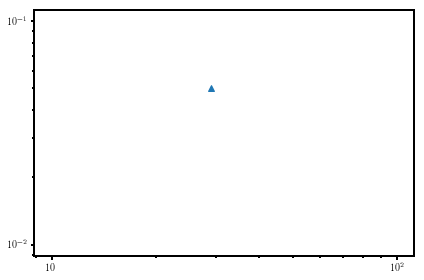

In [49]:
plt.plot(np.ravel(gasdenlist),np.ravel(SFRdenlist),ls='none',marker='^')
plt.yscale('log')
plt.xscale('log')